In [1]:
# Imports
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce
from datetime import datetime as dt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy import stats
from statistics import mean, stdev
from scipy.stats import wilcoxon
from sklearn import preprocessing
import seaborn as sb

In [2]:
pd.set_option('display.max_columns', 1000)
df = pd.read_csv("Dados_Karol.csv")
df.head(2)

,NUMERO_DE_IDENTIFICACAO,PARTICIPANTE,DATA_INICIO,DATA_FIM,DIAS_REMOVIDOS,CLASSIFICAÇÃO_PASSOS,MEDIANA_PASSOS,MÉDIA_PASSOS_DIA,CLASSIFICAÇÃO,TOTAL_ATIVIDADES,TOTAL_ATIVIDADES_VIGOROSAS,TOTAL_ATIVIDADES_MODERADAS,TOTAL_ATIVIDADES_LEVES,TOTAL_MINUTOS_ATIVOS,TOTAL_DIAS_ATIVOS,LOCAL_DE_COLETA,IDADE(ANOS),ESCOLARIDADE (ANOS DE ESTUDO),SEXO,ESTADO CIVIL,OCUPACAO_PROFISSAO,RENDA (RS),ARRANJO_FAMILIAR(QUANTAS PESSOAS RESIDEM NA MESMA CASA),PESO (kg),ALTURA (m),IMC (kg/m2),CD_CARDIOPATIA,CD_HIPERTENSÃO,CD_DIABETES MELLITUS,CD_REUMATISMO,CD_DEPRESSÃO,CD_ANSIEDADE,CD_OSTEOPOROSE,CD_DOENÇA PULMONAR,CD_ACIDENTE VASCULAR ENCEFÁLICO,CD_GLAUCOMA,CD_CATARATA,CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII),CD_DEMÊNCIA,CD_LABIRINTITE,CD_SINUSITE,CD_EPILEPSIA,CD_CEFALÉIA CRÔNICA,CD_CÂNCER DE MAMA,CD_CÂNCER DE TIREOIDE,CD_CÂNCER DE PRÓSTATA,CD_HIPOTIREOIDISMO,CD_ARRITIMIA CARDÍACA,CD_INFARTO AGUDO DO MIOCÁRDIO (IAM),CD_PARKINSON,CD_FIBROMIALGIA,CD_INSUFICIÊNCIA CARDIACA CONGESTIVA (ICC),CD_ESCOLIOSE,CD_GORDURA NO FÍGADO,NUMERO_COMORBIDADES_APRESENTADAS,MEDICAMENTO_CARBAMAZEPINA,MEDICAMENTO_POLTAX,MEDICAMENTO_SINVASTATINA,MEDICAMENTO_HIDROCLOROTIAZIDA,MEDICAMENTO_METFORMINA,MEDICAMENTO_CLONAZEPAM,MEDICAMENTO_ALDOSTERIN,MEDICAMENTO_CORUS (ANTIHIPERTENSIVO),MEDICAMENTO_CARVEDILOL,MEDICAMENTO_INSULINA,MEDICAMENTO_LOSARTANA,MEDICAMENTO_ATENOLOL (ANTIHIPERTENSIVO),MEDICAMENTO_OMEPRAZOL,MEDICAMETO_LEVOID,MEDICAMENTO_FLUOXETINA (ANTIDEPRESIVO),MEDICAMENTO_CONCOR,MEDICAMENTO_ENALAPRIL,MEDICAMENTO_TORSILAX,MEDICAMENTO_VALPROATO DE SODIO,MEDICAMENTO_FUROSEMIDA,MEDICAMENTO_SOMALGIN,MEDICAMENTO_CLORIDRATO DE AMIODARONA,MEDICAMENTO_ANLODIPINO,MEDICAMENTO_ÁCIDO ACETILSALICÍLICO,MEDICAMENTO_CIPROFIBRATO,MEDICAMENTO_ESCITALOPRAN,MEDICAMENTO_ZOLPIDEM,MEDICAMENTO_GABAPENTINA,MEDICAMENTO_DEPAKENE,MEDICAMENTO_TOPIRAMATO,MEDICAMENTO_FENOBARBITAL,MEDICAMENTO_EPELENIT,MEDICAMENTO_CLOPAM,MEDICAMENTO_ANASTRAZOL,MEDICAMENTO_PURAN,MEDICAMENTO_DRENATAN,MEDICAMENTO_METOPROLOL,MEDICAMENTO_ESPIRONOLACTONA,MEDICAMENTO_CLOPIDOGREL,MEDICAMENTO_GLIFAGE,MEDICAMENTO_BROMAZEPAM,MEDICAMENTO_DOXAZOSINA,MEDICAMENTO_HIDROXIZINA,MEDICAMENTO_FINASTERIDA,MEDICAMENTO_VASOPRIL,MEDICAMENTO_RECONTER,MEDICAMENTO_GLICOZIDA,MEDICAMENTO_VALSARTANA,MEDICAMENTO_REUQUINOL,MEDICAMENTO_CLORIDRATO_DE_DONEZEPILA,MEDICAMENTO_CELETIL,MEDICAMENTO_INDAPAMIDA,MEDICAMENTO_OLANZAPINA,MEDICAMENTO_HEMIFURAMATO DE BISOPROLOL,MEDICAMENTO_QUETIAPINA,MEDICAMENTO_ENDOPA,MEDICAMENTO_OLMESARTANA,MEDICAMENTO_CLORIDRATO DE DULOXETINA,MEDICAMENTO_ATORVASTATINA,MEDICAMENTO_COLECALCIFEROL,MEDICAMENTO_ESPIRONOLACTONA.1,MEDICAMENTO_PREGABALINA,MEDICAMENTO_VALERIMED,MEDICAMENTO_LABIRIN,MEDICAMENTO_ALPRAZOLAM,NUMERO_MEDICAMENTOS (DIARIO),RACA/COR,CIRCUNFERENCIA _ABDOMINAL (cm),CIRCUNFERENCIA _CINTURA(cm),CIRCUNFERENCIA_DA_PANTURRILHA_E (cm),CIRCUNFERENCIA_DA_PANTURRILHA_D (cm),INDICE_DE_KATz_TOTAL,INDICE_DE_LAWTON_TOTAL,LEGANES_ORIENTACAO_TEMPORAL,LEGANES_ORIENTACAO_ESPACIAL,LEGANES_INFORMACOES_PESSOAIS,LEGANES_TESTE_DE_NOMEACAO,LEGANES_LEMBRACA_IMEDIATA,LEGANES_MEMORIA_LOGICA,LEGANES_LEMBRANCA_TARDIA,LEGANES_TOTAL_GERAL,CLASSIFICACAO_FRAGILIDADE,SPPB_TESTE_EQUILIBRIO_PONTUACAO_TOTAL,SPPB_TESTE_VELOCIDADE_MARCHA_TOTAL,SPPB_TESTE_SENTAR_LEVANTAR_PONTUACAO_TOTAL,SPPB_PONTUACA0_TOTAL_GERAL,IPAQ_TOTAL_CAMINHADA (MIN/SEMANA),PAQ_TOTAL_MODERADA (MIN/SEMANA),PAQ_TOTAL_VIGOROSA (MIN/SEMANA),IPAQ_CLASSIFICACAO,IPAQ_TEMPO_SENTADO_DIA_SEMANA (HORAS/MIN),IPAQ_TEMPO_SENTADO_DIA_FINAL_SEMANA (HORAS/MIN)
0,619d092e1913dc00199e68fc,MARIA DO SOCORRO SILVA,24/11/2021,1/12/2021,NaN,IRREGULARMENTE ATIVO A,9441.0,9181.25,IRREGULARMENTE ATIVA,4.0,0.0,0.0,4.0,54.0,4.0,1.0,68.0,13.0,1.0,2.0,1.0,NaN,NaN,73.0,"1,53","31,18458712",2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2

#### Estatísticas descritivas

As estatísticas descritivas incluem aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados.

In [3]:
df.rename(columns={"CLASSIFICAÇÃO":"CLASSIFICAÇÃO_ATIVIDADE"}, inplace=True)
df["ALTURA (m)"] = df["ALTURA (m)"].str.replace(",",".").astype(float)
df["IMC (kg/m2)"] = df["IMC (kg/m2)"].str.replace(",",".").astype(float)
df["CIRCUNFERENCIA_DA_PANTURRILHA_E (cm)"] = df["CIRCUNFERENCIA_DA_PANTURRILHA_E (cm)"].astype(str).str.replace(",",".").astype(float)
df["CIRCUNFERENCIA_DA_PANTURRILHA_D (cm)"] = df["CIRCUNFERENCIA_DA_PANTURRILHA_D (cm)"].astype(str).str.replace(",",".").astype(float)
df["IPAQ_TEMPO_SENTADO_DIA_SEMANA (HORAS/MIN)"] = df["IPAQ_TEMPO_SENTADO_DIA_SEMANA (HORAS/MIN)"].astype(str).str.replace(",",".").astype(float)
df["IPAQ_TEMPO_SENTADO_DIA_FINAL_SEMANA (HORAS/MIN)"] = df["IPAQ_TEMPO_SENTADO_DIA_FINAL_SEMANA (HORAS/MIN)"].astype(str).str.replace(",",".").astype(float)
df.dropna(subset=["IPAQ_CLASSIFICACAO","CLASSIFICAÇÃO_ATIVIDADE","CLASSIFICAÇÃO_PASSOS"], inplace=True)
df.describe().iloc[1:,:]

,MEDIANA_PASSOS,MÉDIA_PASSOS_DIA,TOTAL_ATIVIDADES,TOTAL_ATIVIDADES_VIGOROSAS,TOTAL_ATIVIDADES_MODERADAS,TOTAL_ATIVIDADES_LEVES,TOTAL_MINUTOS_ATIVOS,TOTAL_DIAS_ATIVOS,LOCAL_DE_COLETA,IDADE(ANOS),ESCOLARIDADE (ANOS DE ESTUDO),SEXO,ESTADO CIVIL,OCUPACAO_PROFISSAO,RENDA (RS),ARRANJO_FAMILIAR(QUANTAS PESSOAS RESIDEM NA MESMA CASA),PESO (kg),ALTURA (m),IMC (kg/m2),CD_CARDIOPATIA,CD_HIPERTENSÃO,CD_DIABETES MELLITUS,CD_REUMATISMO,CD_DEPRESSÃO,CD_ANSIEDADE,CD_OSTEOPOROSE,CD_DOENÇA PULMONAR,CD_ACIDENTE VASCULAR ENCEFÁLICO,CD_GLAUCOMA,CD_CATARATA,CD_PROBLEMA CIRCULATÓRIO/VARIZES (MMII),CD_DEMÊNCIA,CD_LABIRINTITE,CD_SINUSITE,CD_EPILEPSIA,CD_CEFALÉIA CRÔNICA,CD_CÂNCER DE MAMA,CD_CÂNCER DE TIREOIDE,CD_CÂNCER DE PRÓSTATA,CD_HIPOTIREOIDISMO,CD_ARRITIMIA CARDÍACA,CD_INFARTO AGUDO DO MIOCÁRDIO (IAM),CD_PARKINSON,CD_FIBROMIALGIA,CD_INSUFICIÊNCIA CARDIACA CONGESTIVA (ICC),CD_ESCOLIOSE,CD_GORDURA NO FÍGADO,NUMERO_COMORBIDADES_APRESENTADAS,MEDICAMENTO_CARBAMAZEPINA,MEDICAMENTO_POLTAX,MEDICAMENTO_SINVASTATINA,MEDICAMENTO_HIDROCLOROTIAZIDA,MEDICAMENTO_METFORMINA,MEDICAMENTO_CLONAZEPAM,MEDICAMENTO_ALDOSTERIN,MEDICAMENTO_CORUS (ANTIHIPERTENSIVO),MEDICAMENTO_CARVEDILOL,MEDICAMENTO_INSULINA,MEDICAMENTO_LOSARTANA,MEDICAMENTO_ATENOLOL (ANTIHIPERTENSIVO),MEDICAMENTO_OMEPRAZOL,MEDICAMETO_LEVOID,MEDICAMENTO_FLUOXETINA (ANTIDEPRESIVO),MEDICAMENTO_CONCOR,MEDICAMENTO_ENALAPRIL,MEDICAMENTO_TORSILAX,MEDICAMENTO_VALPROATO DE SODIO,MEDICAMENTO_FUROSEMIDA,MEDICAMENTO_SOMALGIN,MEDICAMENTO_CLORIDRATO DE AMIODARONA,MEDICAMENTO_ANLODIPINO,MEDICAMENTO_ÁCIDO ACETILSALICÍLICO,MEDICAMENTO_CIPROFIBRATO,MEDICAMENTO_ESCITALOPRAN,MEDICAMENTO_ZOLPIDEM,MEDICAMENTO_GABAPENTINA,MEDICAMENTO_DEPAKENE,MEDICAMENTO_TOPIRAMATO,MEDICAMENTO_FENOBARBITAL,MEDICAMENTO_EPELENIT,MEDICAMENTO_CLOPAM,MEDICAMENTO_ANASTRAZOL,MEDICAMENTO_PURAN,MEDICAMENTO_DRENATAN,MEDICAMENTO_METOPROLOL,MEDICAMENTO_ESPIRONOLACTONA,MEDICAMENTO_CLOPIDOGREL,MEDICAMENTO_GLIFAGE,MEDICAMENTO_BROMAZEPAM,MEDICAMENTO_DOXAZOSINA,MEDICAMENTO_HIDROXIZINA,MEDICAMENTO_FINASTERIDA,MEDICAMENTO_VASOPRIL,MEDICAMENTO_RECONTER,MEDICAMENTO_GLICOZIDA,MEDICAMENTO_VALSARTANA,MEDICAMENTO_REUQUINOL,MEDICAMENTO_CLORIDRATO_DE_DONEZEPILA,MEDICAMENTO_CELETIL,MEDICAMENTO_INDAPAMIDA,MEDICAMENTO_OLANZAPINA,MEDICAMENTO_HEMIFURAMATO DE BISOPROLOL,MEDICAMENTO_QUETIAPINA,MEDICAMENTO_ENDOPA,MEDICAMENTO_OLMESARTANA,MEDICAMENTO_CLORIDRATO DE DULOXETINA,MEDICAMENTO_ATORVASTATINA,MEDICAMENTO_COLECALCIFEROL,MEDICAMENTO_ESPIRONOLACTONA.1,MEDICAMENTO_PREGABALINA,MEDICAMENTO_VALERIMED,MEDICAMENTO_LABIRIN,MEDICAMENTO_ALPRAZOLAM,NUMERO_MEDICAMENTOS (DIARIO),RACA/COR,CIRCUNFERENCIA _ABDOMINAL (cm),CIRCUNFERENCIA _CINTURA(cm),CIRCUNFERENCIA_DA_PANTURRILHA_E (cm),CIRCUNFERENCIA_DA_PANTURRILHA_D (cm),INDICE_DE_KATz_TOTAL,INDICE_DE_LAWTON_TOTAL,LEGANES_ORIENTACAO_TEMPORAL,LEGANES_ORIENTACAO_ESPACIAL,LEGANES_INFORMACOES_PESSOAIS,LEGANES_TESTE_DE_NOMEACAO,LEGANES_LEMBRACA_IMEDIATA,LEGANES_MEMORIA_LOGICA,LEGANES_LEMBRANCA_TARDIA,LEGANES_TOTAL_GERAL,CLASSIFICACAO_FRAGILIDADE,SPPB_TESTE_EQUILIBRIO_PONTUACAO_TOTAL,SPPB_TESTE_VELOCIDADE_MARCHA_TOTAL,SPPB_TESTE_SENTAR_LEVANTAR_PONTUACAO_TOTAL,SPPB_PONTUACA0_TOTAL_GERAL,IPAQ_TOTAL_CAMINHADA (MIN/SEMANA),PAQ_TOTAL_MODERADA (MIN/SEMANA),PAQ_TOTAL_VIGOROSA (MIN/SEMANA),IPAQ_CLASSIFICACAO,IPAQ_TEMPO_SENTADO_DIA_SEMANA (HORAS/MIN),IPAQ_TEMPO_SENTADO_DIA_FINAL_SEMANA (HORAS/MIN)
mean,10951.848214,10780.258214,16.750000,0.607143,11.267857,4.875000,307.160714,5.303571,1.392857,73.339286,7.017857,1.357143,2.571429,2.410714,NaN,1.880000,65.625000,1.570714,26.584526,1.839286,1.339286,1.696429,1.642857,1.857143,1.803571,1.946429,1.982143,2.0,1.928571,1.964286,1.946429,1.982143,1.964286,1.964286,1.982143,2.0,1.964286,2.0,1.982143,1.964286,2.0,2.0,2.0,2.0,1.982143,1.982143,1.982143,2.303571,1.982143,1.982143,1.857143,1.767857,1.857143,1.928571,2.0,1.946429,2.0,1.946429,1.678571,1.946429,1.982143,1.982143,1.964286,1.982143,1.946429,2.0,1.982143,2.0,1.982143,2.0,1.928571,1.964286,1.982143,1.982143,1.982143,2.0,2.0,2.0,1.982143,1.982143,2.0,1.98

In [4]:
df.describe(include=[object])

,NUMERO_DE_IDENTIFICACAO,PARTICIPANTE,DATA_INICIO,DATA_FIM,DIAS_REMOVIDOS,CLASSIFICAÇÃO_PASSOS,CLASSIFICAÇÃO_ATIVIDADE
count,56,56,56,56,16,56,56
unique,56,56,29,29,14,5,4
top,619d092e1913dc00199e68fc,MARIA DO SOCORRO SILVA,17/02/2022,24/02/2022,19/04/2022,MUITO ATIVO,ATIVA
freq,1,1,4,4,2,20,31


#### Classificação pelo número de passos

In [5]:
df["CLASSIFICAÇÃO_PASSOS"].value_counts()

MUITO ATIVO               20
IRREGULARMENTE ATIVO B    13
IRREGULARMENTE ATIVO A    10
ATIVO                      9
SEDENTÁRIO                 4
Name: CLASSIFICAÇÃO_PASSOS, dtype: int64

In [6]:
label_encoder = preprocessing.LabelEncoder()
df["CLASSIFICAÇÃO_PASSOS"] = label_encoder.fit_transform(df["CLASSIFICAÇÃO_PASSOS"]) 
df["CLASSIFICAÇÃO_PASSOS"].value_counts()

3    20
2    13
1    10
0     9
4     4
Name: CLASSIFICAÇÃO_PASSOS, dtype: int64

#### Classificação pelo nível de atividade

In [7]:
df["CLASSIFICAÇÃO_ATIVIDADE"].value_counts()

ATIVA                   31
IRREGULARMENTE ATIVA    23
MUITO ATIVA              1
SEDENTÁRIA               1
Name: CLASSIFICAÇÃO_ATIVIDADE, dtype: int64

In [8]:
df.replace({"SEDENTÁRIA":1,"IRREGULARMENTE ATIVA":2,"ATIVA":3,"MUITO ATIVA":4}, inplace=True)
df["CLASSIFICAÇÃO_ATIVIDADE"].value_counts()

3    31
2    23
4     1
1     1
Name: CLASSIFICAÇÃO_ATIVIDADE, dtype: int64

#### Classificação IPAQ

In [9]:
df["IPAQ_CLASSIFICACAO"].value_counts(dropna=False)

4.0    30
3.0    12
2.0     7
1.0     5
5.0     2
Name: IPAQ_CLASSIFICACAO, dtype: int64

#### Teste KS

In [10]:
def cdf(sample, x, sort = False):
    if sort:
        sample.sort()
    cdf = sum(sample <= x)
    cdf = cdf / len(sample)
    return cdf

In [11]:
def ks_norm(sample):
    sample.sort()
    D_ks = []
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [12]:
ks_norm_a = ks_norm(df["CLASSIFICAÇÃO_PASSOS"].values)
print(f"CLASSIFICAÇÃO_PASSOS: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, é normal = {ks_norm_a['p_value'] > 0.05})")

CLASSIFICAÇÃO_PASSOS: ks = 0.5021 (p-value = 1.383e-13, é normal = False)


In [13]:
ks_norm_a = ks_norm(df["CLASSIFICAÇÃO_ATIVIDADE"].values)
print(f"CLASSIFICAÇÃO_ATIVIDADE: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, é normal = {ks_norm_a['p_value'] > 0.05})")

CLASSIFICAÇÃO_ATIVIDADE: ks = 0.8235 (p-value = 2.547e-42, é normal = False)


In [14]:
ks_norm_a = ks_norm(df["IPAQ_CLASSIFICACAO"].values)
print(f"IPAQ_CLASSIFICACAO: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, é normal = {ks_norm_a['p_value'] > 0.05})")

IPAQ_CLASSIFICACAO: ks = 0.7630 (p-value = 1.509e-34, é normal = False)


Text(0.5, 1.0, 'PASSOS: Q-Q Plot')

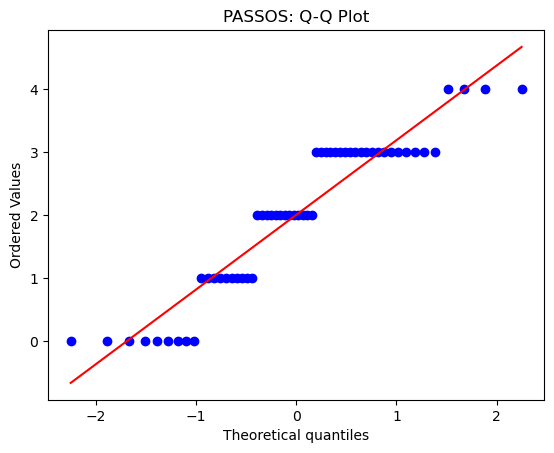

In [15]:
stats.probplot(df["CLASSIFICAÇÃO_PASSOS"], dist="norm", plot=plt)
plt.title("PASSOS: Q-Q Plot")

Text(0.5, 1.0, 'ATIVIDADE: Q-Q Plot')

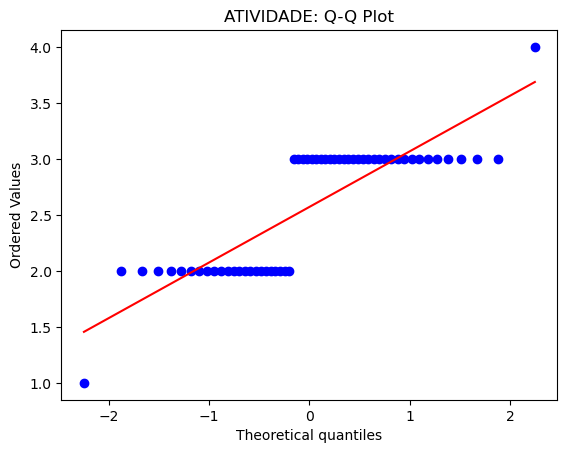

In [16]:
stats.probplot(df["CLASSIFICAÇÃO_ATIVIDADE"], dist="norm", plot=plt)
plt.title("ATIVIDADE: Q-Q Plot")

Text(0.5, 1.0, 'IPAQ: Q-Q Plot')

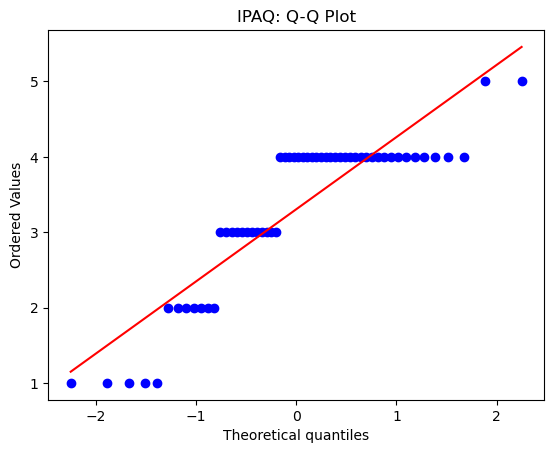

In [17]:
stats.probplot(df["IPAQ_CLASSIFICACAO"], dist="norm", plot=plt)
plt.title("IPAQ: Q-Q Plot")

In [18]:
columns = ['CLASSIFICAÇÃO_PASSOS','MEDIANA_PASSOS','MÉDIA_PASSOS_DIA',
 'CLASSIFICAÇÃO_ATIVIDADE','TOTAL_ATIVIDADES','TOTAL_ATIVIDADES_VIGOROSAS',
 'TOTAL_ATIVIDADES_MODERADAS','TOTAL_ATIVIDADES_LEVES','TOTAL_MINUTOS_ATIVOS',
 'TOTAL_DIAS_ATIVOS','INDICE_DE_KATz_TOTAL','INDICE_DE_LAWTON_TOTAL','LEGANES_ORIENTACAO_TEMPORAL','LEGANES_ORIENTACAO_ESPACIAL',
 'LEGANES_INFORMACOES_PESSOAIS','LEGANES_TESTE_DE_NOMEACAO','LEGANES_LEMBRACA_IMEDIATA',
 'LEGANES_MEMORIA_LOGICA','LEGANES_LEMBRANCA_TARDIA','LEGANES_TOTAL_GERAL',
 'CLASSIFICACAO_FRAGILIDADE','SPPB_TESTE_EQUILIBRIO_PONTUACAO_TOTAL',
 'SPPB_TESTE_VELOCIDADE_MARCHA_TOTAL','SPPB_TESTE_SENTAR_LEVANTAR_PONTUACAO_TOTAL',
 'SPPB_PONTUACA0_TOTAL_GERAL','IPAQ_TOTAL_CAMINHADA (MIN/SEMANA)','PAQ_TOTAL_MODERADA (MIN/SEMANA)',
 'PAQ_TOTAL_VIGOROSA (MIN/SEMANA)','IPAQ_CLASSIFICACAO','IPAQ_TEMPO_SENTADO_DIA_SEMANA (HORAS/MIN)',
 'IPAQ_TEMPO_SENTADO_DIA_FINAL_SEMANA (HORAS/MIN)']

#### Correlação de Spearman

<AxesSubplot:>

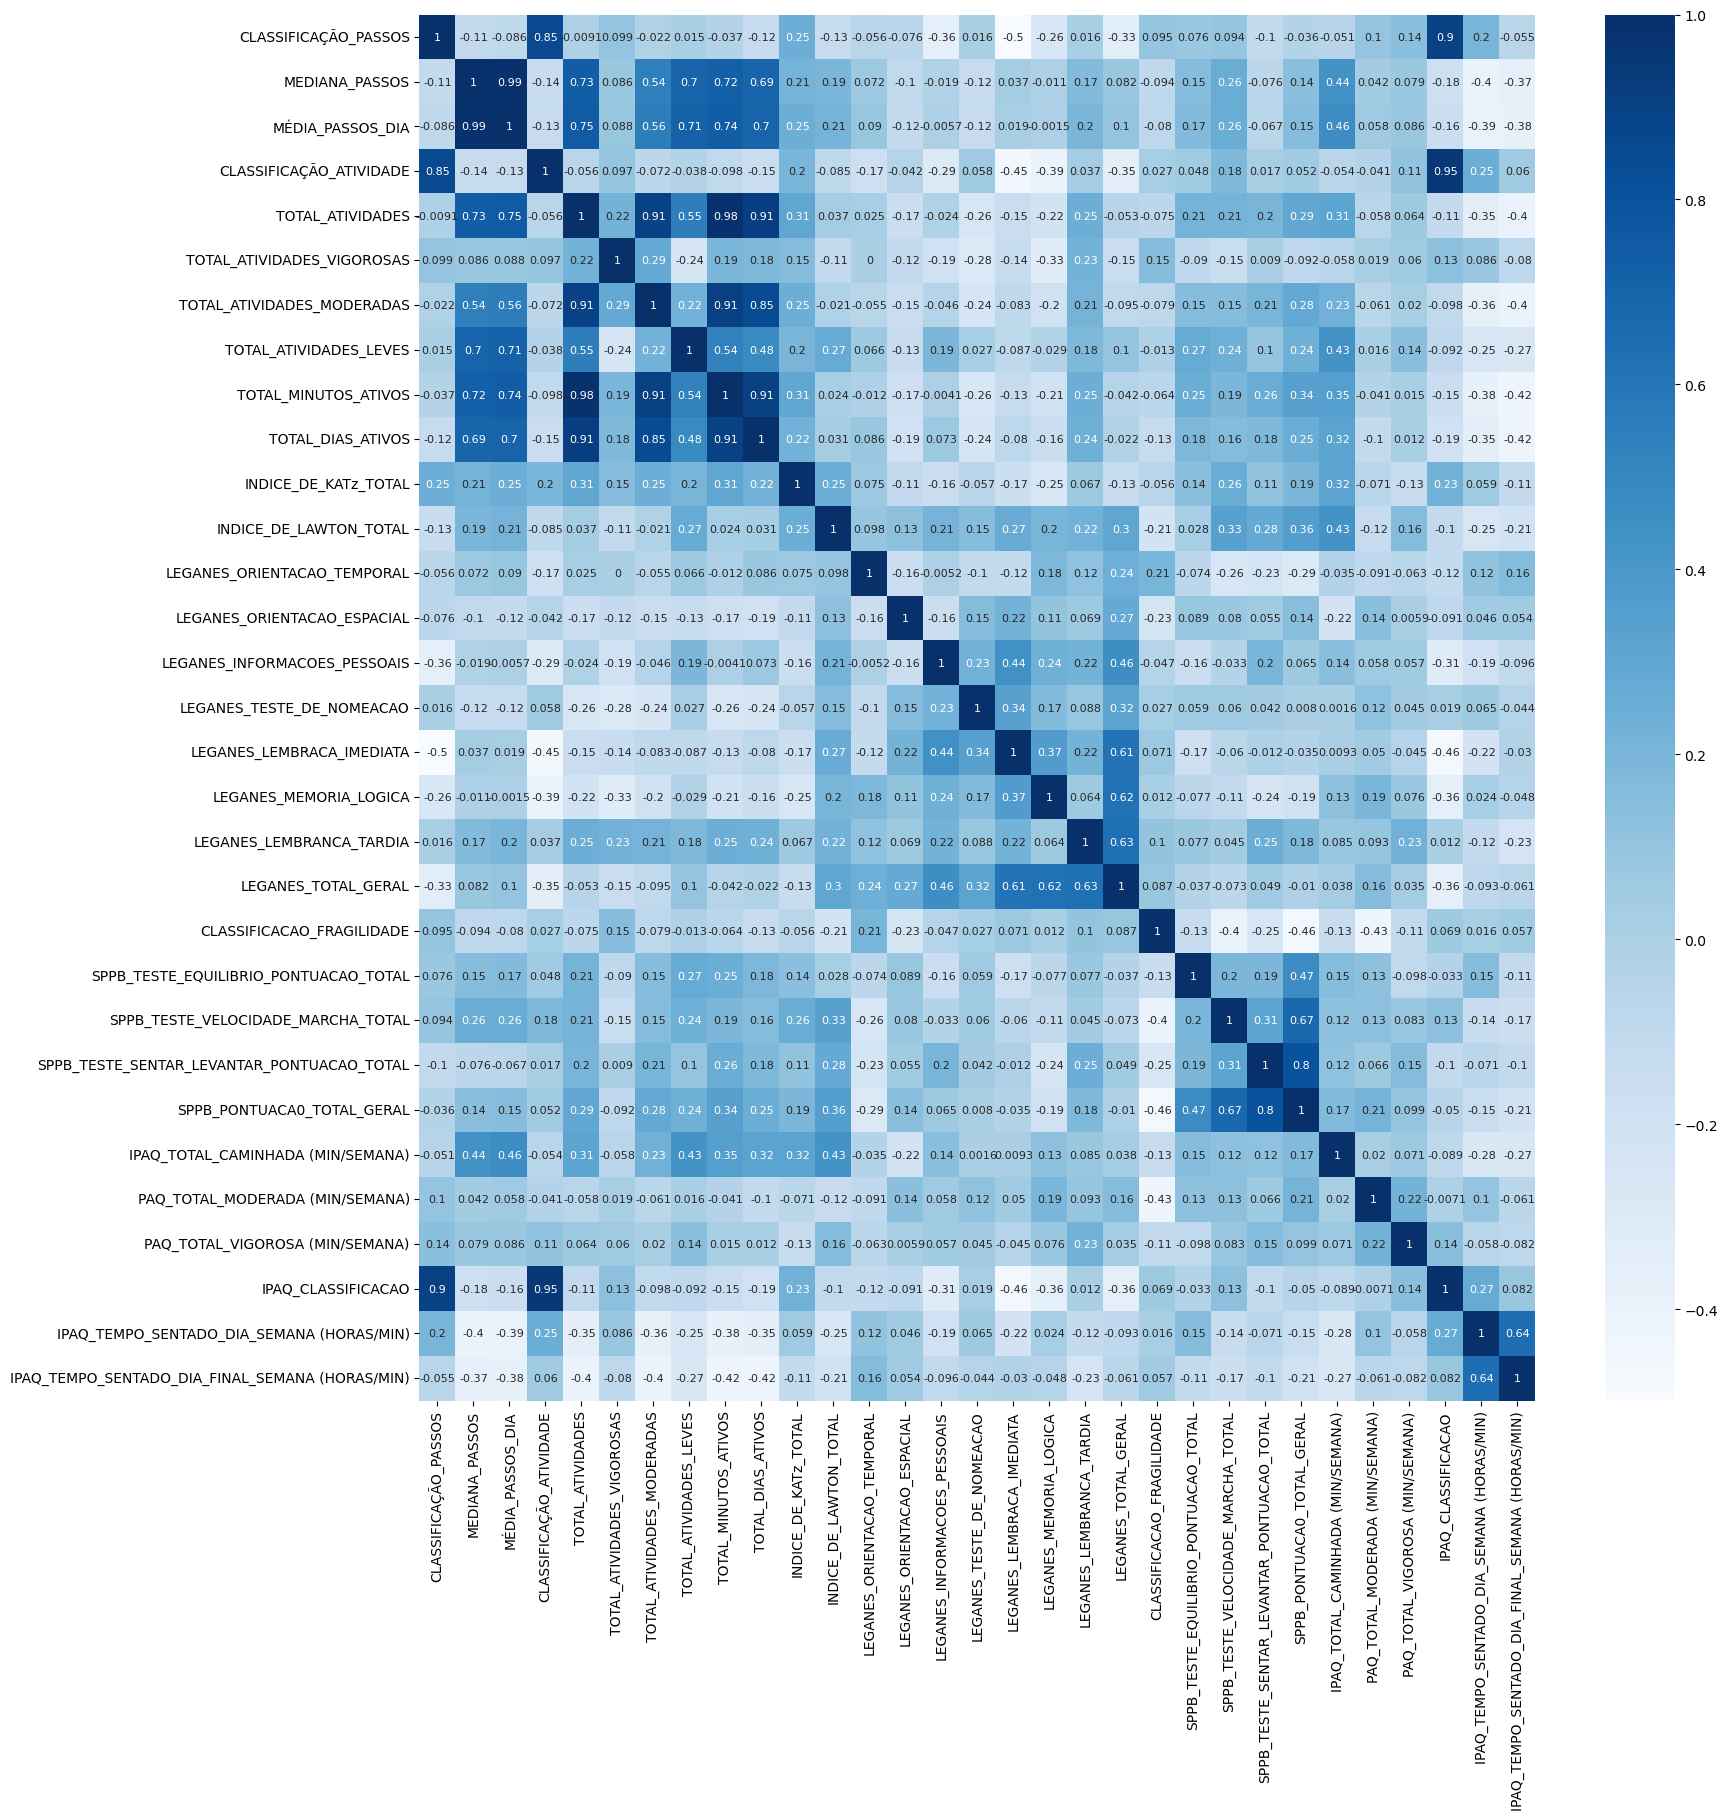

In [19]:
fig, ax = plt.subplots(figsize=(18,18))  
sb.heatmap(df[columns].corr(method="spearman"), cmap='Blues', annot=True, ax=ax, annot_kws={"size": 8})

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   
    md        = np.mean(diff)                   
    sd        = np.std(diff, axis=0)            
    CI_low    = md - 1.96*sd
    CI_high   = md + 1.96*sd

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='black', linestyle='-')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    return md, sd, mean, CI_low, CI_high

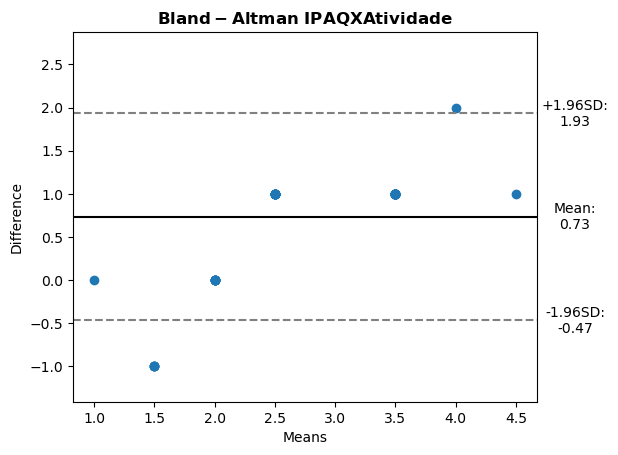

In [21]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(df["IPAQ_CLASSIFICACAO"].values, df["CLASSIFICAÇÃO_ATIVIDADE"].values)
plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{IPAQ X Atividade}$")
plt.xlabel("Means")
plt.ylabel("Difference")
plt.ylim(md - 3.5*sd, md + 3.5*sd)

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    )
plt.subplots_adjust(right=0.85)

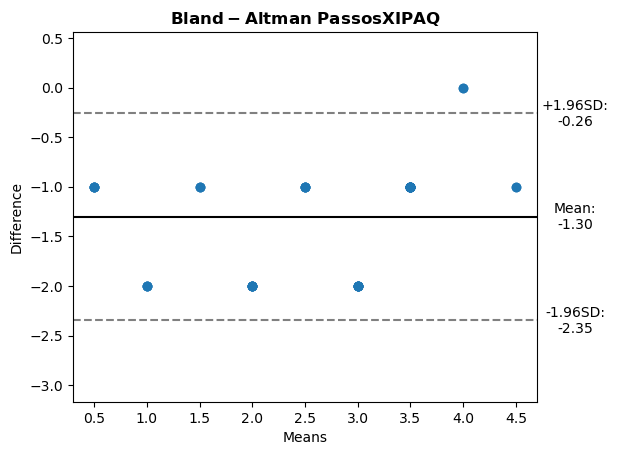

In [22]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(df["CLASSIFICAÇÃO_PASSOS"].values, df["IPAQ_CLASSIFICACAO"].values)
plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Passos X IPAQ}$")
plt.xlabel("Means")
plt.ylabel("Difference")
plt.ylim(md - 3.5*sd, md + 3.5*sd)

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    )
plt.subplots_adjust(right=0.85)

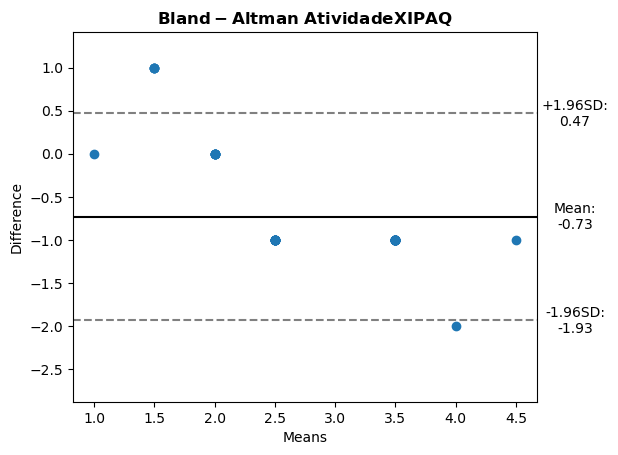

In [23]:
md, sd, mean, CI_low, CI_high = bland_altman_plot(df["CLASSIFICAÇÃO_ATIVIDADE"].values, df["IPAQ_CLASSIFICACAO"].values)
plt.title(r"$\mathbf{Bland-Altman}$" + " " + r"$\mathbf{Atividade X IPAQ}$")
plt.xlabel("Means")
plt.ylabel("Difference")
plt.ylim(md - 3.5*sd, md + 3.5*sd)

xOutPlot = np.min(mean) + (np.max(mean)-np.min(mean))*1.14

plt.text(xOutPlot, md - 1.96*sd, 
    r'-1.96SD:' + "\n" + "%.2f" % CI_low, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md + 1.96*sd, 
    r'+1.96SD:' + "\n" + "%.2f" % CI_high, 
    ha = "center",
    va = "center",
    )
plt.text(xOutPlot, md, 
    r'Mean:' + "\n" + "%.2f" % md, 
    ha = "center",
    va = "center",
    )
plt.subplots_adjust(right=0.85)